In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def rt(t):
    log=(R_s-R_f)/(1+np.exp(-k*(-t+x0)))+R_f
    return log

def betat(t):
    beta=gamma*rt(t)
    return beta

def bedst(t):
    return s*beds_0*t+beds_0

In [3]:
N=4500           #populace
D=8             #doba trvání infekce
gamma=1/D         #koeficient uzdaravování
#R_0=3            #reprodukční číslo
#beta=R_0*gamma   #počet nakažených za den
delta=1/3         #inkubační doba
#alpha=0.3        #úmrtnost
#rho = 1/1000     #rychlost za jakou člověk zemře
t = np.linspace(0, 199, 200) #časová osa

S_0, E_0, I_0, R_0, D_0 = N-1, 10, 0, 0,0  #počáteční podmníky
R_f, R_s, k, x0 = 0.8, 3.6, 2 ,20

In [4]:
def deriv2(y, t, N, gamma, delta, x, p, t_CR, t_CD, t_CH, beds):
    S, E, I, C, R, D = y
    dSdt = -betat(t) * S * I / N
    dEdt = betat(t) * S * I / N - delta * E
    dIdt = delta * E - 1/t_IC * p * I - gamma * (1 - p) * I
    dCdt = 1/t_IC * p* I - 1/t_CD * x * min(beds, C) - max(0, C-beds) - (1 - x) * 1/t_CR * min(beds, C)
    dRdt = gamma * (1 - p) * I + (1 - x) * 1/t_CR * min(beds, C)
    dDdt = 1/t_CD * x * min(beds, C) + max(0, C-beds)
    return dSdt, dEdt, dIdt, dCdt, dRdt, dDdt

In [5]:
C_0 = 0     #počáteční počet pacientů v kritickém stavu

beds=9000   #počet lůžek v nemocnici
t_IC=12     #doba za jakou se pacient dosatene z I do C
t_CD=10     #doba z C do D
t_CR=14    #doba z C do R
x=0.46      #pravdepodobnost, ze se clovek dostane z C do D
p=0.23      #pravdepodobnost, ze se clovek dostane z I do C

y0=S_0,E_0,I_0,C_0,R_0,D_0
ret = odeint(deriv2, y0, t, args=(N, gamma, delta,x,p,t_CR,t_CD,t_IC,beds))
S, E, I, C, R, D = ret.T

In [6]:
def graf(t,S,I,E,R,C,rt):
    fig,ax=plt.subplots(1,3,figsize=(25,5))
    f,axes=plt.subplots(1,1,figsize=(25,5))
       
    axes.plot(t,S,"g",label="Susceptible")
    axes.plot(t,I,"b",label="Infected")
    axes.plot(t,E,color="orange",label="Exposed")
    axes.plot(t,R,"y",label="Recovered")
    axes.plot(t,D,'r--',label="Dead")
    axes.plot(t,C,"--",label="Critical")
    axes.plot(t,S+I+E+R+C+D,"black",label="Total")
    axes.set_title("SEIR MODEL")
    axes.legend(loc=1)
    axes.grid(True)
    axes.set_xlabel("t[day]")
            
    ax[0].plot(t,I,"b",label="Infected")
    ax[0].plot(t,E,color="orange",label="Exposed")
    ax[0].plot(t,D,'r--',label="Dead")
    #ax[0].plot(t,C,"--",label="Critical")
    ax[0].set_title("Infected, Exposed and dead")
    
    ax[1].plot(t,rt(t),"black",label="$R_0(t), k=%.3g$"%k)
    ax[1].set_title("Basic reproduction number $R_0$")
    
    dead_daily = [0]+[D[i]-D[i-1]  for i in range(1, len(t))]
    critical_daily = [0]+[C[i]-C[i-1]  for i in range(1, len(t))]
    ax[2].plot(t, dead_daily, 'r--', alpha=0.7, linewidth=2, label='Dead per day')
    ax[2].plot(t, critical_daily, 'b--', alpha=0.7, linewidth=2, label='Critical per day')
    ax[2].set_title("Critical and deads per day")
    
    for  i in range(3):
        ax[i].legend(loc=1)
        ax[i].grid(True)
        ax[i].set_xlabel("t[day]")
        if i==2:
            ax[i].set_ylabel("$R_0$")
        else:
            ax[i].set_ylabel("N-population")
        
    plt.show()

In [7]:
def graf2(t,I,R):
    fig,ax=plt.subplots(1,2,figsize=(25,5))
    
    infect_daily=[0]+[I[i]-I[i-1]  for i in range(1, len(t))]
    recover_daily=[0]+[R[i]-R[i-1]  for i in range(1, len(t))]
    
    for i in range(2):
        #ax[i].legend(loc=1)
        ax[i].grid(True)
        ax[i].set_xlabel("t[day]")
        if i==0:
            ax[i].plot(t,infect_daily,"b",label="Infect per day")
            ax[i].set_title("Infected per day")
        else:
            ax[i].plot(t,recover_daily,"y",label="Recovered per day")
            ax[i].set_title("Recovered per day")
        ax[i].legend(loc=1)
                
   # plt.show()
    plt.savefig('SEIR.png')


In [8]:
max_S, max_E, max_I, max_R, max_D=max(S), max(E), max(I), max(R), max(D)

maxSt, maxEt, maxIt, maxRt,maxDt = np.argmax(S), np.argmax(E), np.argmax(I), np.argmax(R),np.argmax(D)

print("Max infected pop. Imax=%f, t=%f"%(max_I,maxIt))
print("Max exposed pop. Emax=%f, t=%f"%(max_E,maxEt))
print("Max dead pop. Dmax=%f, t=%f"%(max_D,maxDt))


Max infected pop. Imax=175.378569, t=25.000000
Max exposed pop. Emax=104.141810, t=20.000000
Max dead pop. Dmax=93.614337, t=199.000000


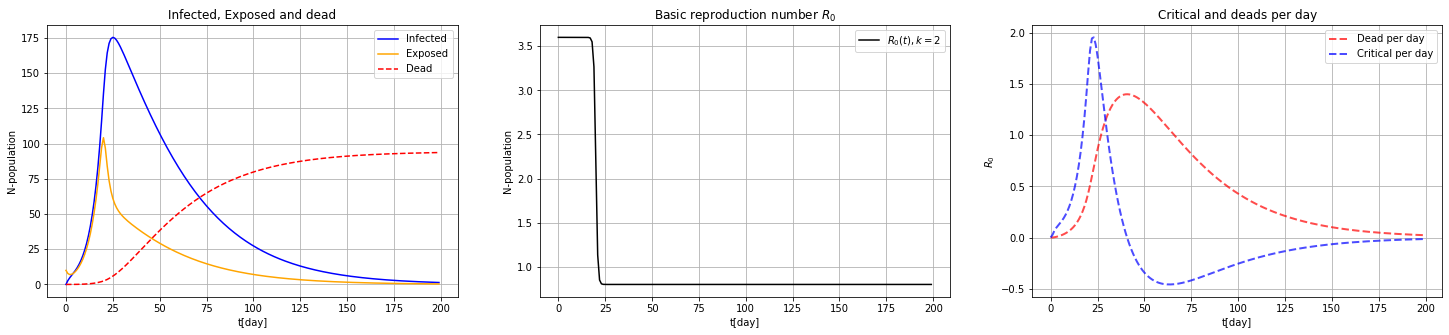

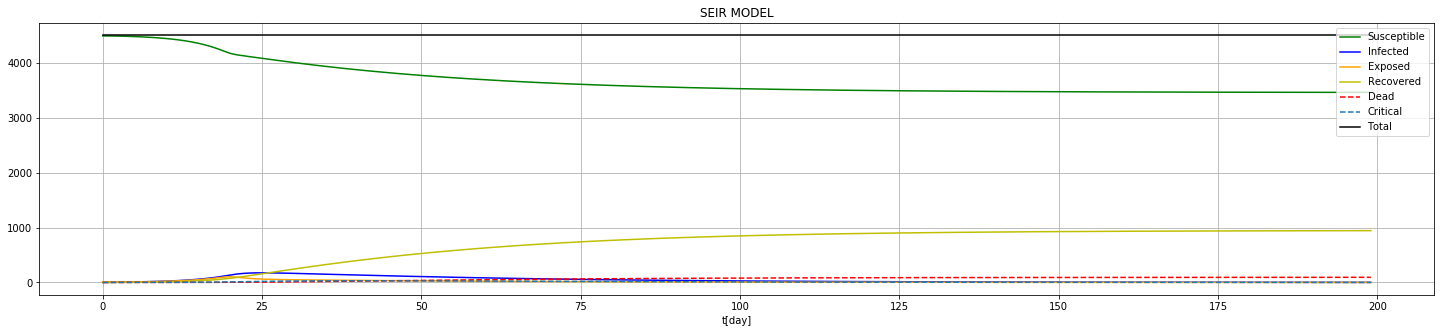

In [9]:
graf(t,S,I,E,R,C,rt)

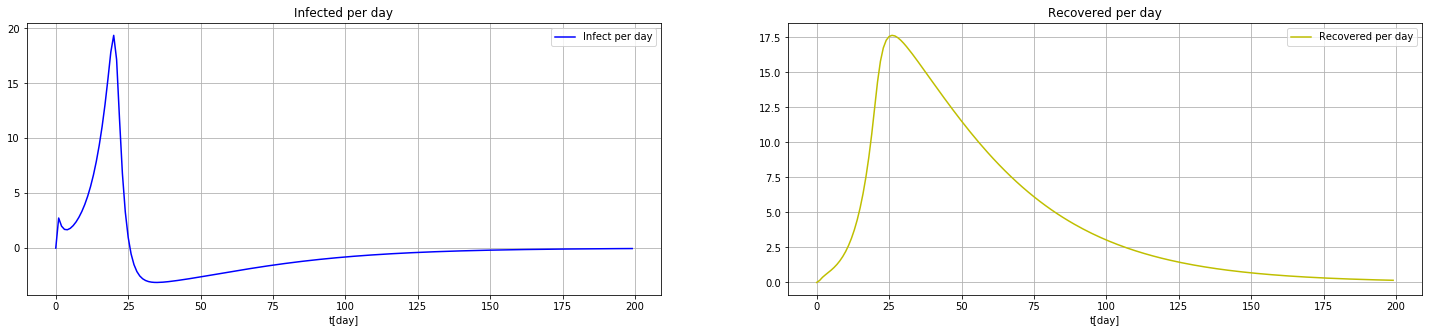

In [10]:
graf2(t,I,R)